In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
import pickle

from MLP import *
#from gridSearch import *

def transform(tx):
    n_classes = [3,3,2,3,4,2]
    tx = tx-1
    mat = []
    for i,pattern in enumerate(tx):
        l = list( [to_categorical( pattern[i] , n_classes[i] ) for i in range(len(pattern) ) ]  )
        p = np.concatenate( l )
        mat = np.hstack( (mat,p) )
    return mat.reshape( np.size(tx,axis=0), 17 )

# monk 1

In [2]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-1.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:] ; tx = transform(tx)

te_data = pd.read_csv('monk_tests/monks-1.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:,0] ; vy = to_categorical(vy)
vx = te_data[:,1:] ; vx = transform(vx)

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)

(123, 17) (123, 2)
(431, 17) (431, 2)


## mb

In [3]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax',w_range=0.7)

In [5]:

n.train(tx, ty, 1e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 30,
  tresh = 0.01,
  measure_interval = 30,
  bs=30 )

training error atm: 1.0, validation error 1.0, epoch=29


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


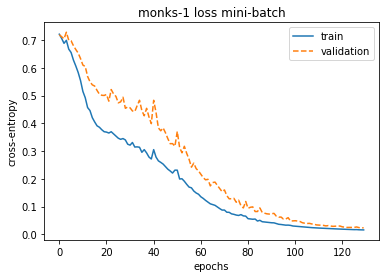

In [6]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-1 loss mini-batch")
plt.legend()
plt.savefig('monk_figures/monk1_loss_minibatch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


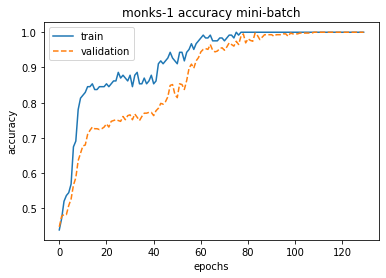

In [8]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-1 accuracy mini-batch")
plt.savefig('monk_figures/monk1_acc_minibatch.eps',format='eps')

n.error(tx,ty), n.error(vx,vy)
n.save('monk_nets/monk1_minibatch.net')

 ## no mb

In [9]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax', w_range=0.7)

n.train(tx, ty, 3e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=None )

final error: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


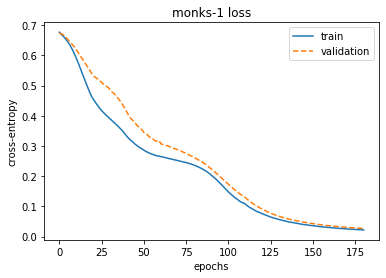

In [10]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-1 loss")
plt.legend()
plt.savefig('monk_figures/monk1_loss_batch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1.0, 1.0)

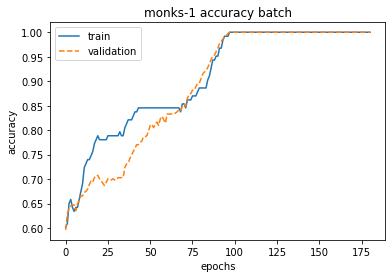

In [11]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-1 accuracy batch")
plt.savefig('monk_figures/monk1_acc_batch.eps',format='eps')
n.save('monk_nets/monk1_batch.net')
n.error(tx,ty), n.error(vx,vy)

# monk 2

In [72]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-2.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:] ; tx = transform(tx)

te_data = pd.read_csv('monk_tests/monks-2.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:,0] ; vy = to_categorical(vy)
vx = te_data[:,1:] ; vx = transform(vx)

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)

(168, 17) (168, 2)
(431, 17) (431, 2)


## mb

In [73]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

final error: 0.9642857142857143


In [74]:

n.train(tx, ty, 1e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 10,
  bs=30 )

final error: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


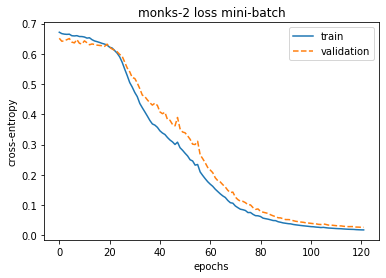

In [75]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-2 loss mini-batch")
plt.legend()
plt.savefig('monk_figures/monk2_loss_minibatch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1.0, 1.0, 1.0)

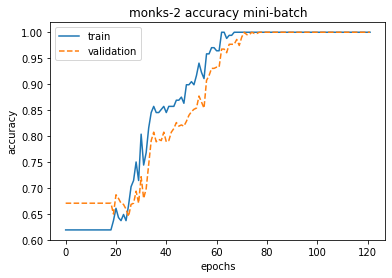

In [76]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-2 accuracy mini-batch")
plt.savefig('monk_figures/monk2_acc_minibatch.eps',format='eps')
n.save('monk_nets/monk2_minibatch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

# no mb

In [80]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

In [81]:
n.train(tx, ty, 3e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=None )

final error: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


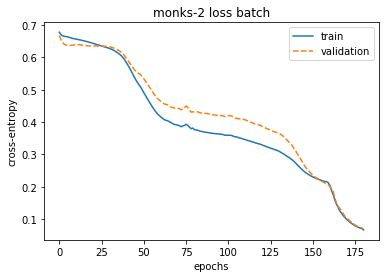

In [82]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-2 loss batch")
plt.legend()
plt.savefig('monk_figures/monk2_loss_batch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1.0, 1.0, 1.0)

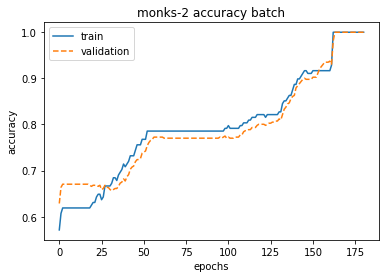

In [83]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-2 accuracy batch")
plt.savefig('monk_figures/monk2_acc_batch.eps',format='eps')
n.save('monk_nets/monk2_batch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

# monk 3

In [84]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-3.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:] ; tx = transform(tx)

te_data = pd.read_csv('monk_tests/monks-3.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:,0] ; vy = to_categorical(vy)
vx = te_data[:,1:] ; vx = transform(vx)

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)

(121, 17) (121, 2)
(431, 17) (431, 2)


## mb

In [91]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

In [92]:
n.train(tx, ty, 1e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=30 )

final error: 0.9834710743801653


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


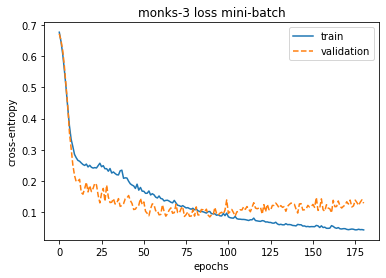

In [93]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-3 loss mini-batch")
plt.legend()
plt.savefig('monk_figures/monk3_loss_minibatch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(0.9834710743801653, 0.9489559164733179, 0.5039370078740157)

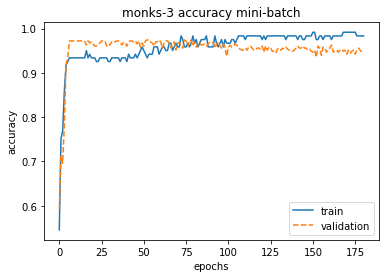

In [94]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-3 accuracy mini-batch")
plt.savefig('monk_figures/monk3_acc_minibatch.eps',format='eps')
n.save('monk_nets/monk3_minibatch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

## no mb

In [95]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

n.train(tx, ty, 3e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=None )

final error: 0.9834710743801653


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


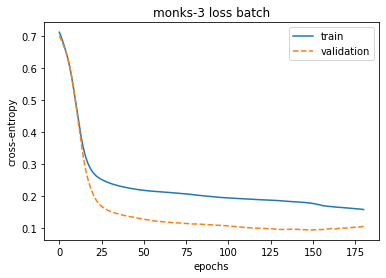

In [96]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-3 loss batch")
plt.legend()
plt.savefig('monk_figures/monk3_loss_batch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(0.9834710743801653, 0.9698375870069605, 0.5118110236220472)

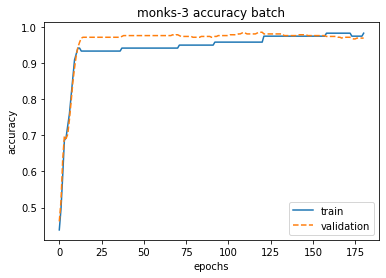

In [97]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-3 accuracy batch")
plt.savefig('monk_figures/monk3_acc_batch.eps',format='eps')
n.save('monk_nets/monk3_batch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

In [15]:
for i in range(1,4):
    file1='monk_nets/monk'+str(i)+'_batch.net'
    file1=open(file1,'rb')
    net_batch=pickle.load(file1)
    print('Batch training for Monk',i,'with batch')
    print('Training loss = ',net_batch.train_loss_history[-1])
    print('Validation loss=',net_batch.valid_loss_history[-1],'\n')

    file2='monk_nets/monk'+str(i)+'_minibatch.net'
    file2=open(file2,'rb')
    net_minibatch=pickle.load(file2)
    print('Batch training for Monk', i ,'with minibatch')
    print('Training loss = ',net_minibatch.train_loss_history[-1])
    print('Validation loss=',net_minibatch.valid_loss_history[-1],'\n\n\n')

Batch training for Monk 1 with batch
Training loss =  0.022302931744794575
Validation loss= 0.02690052771271859 

Batch training for Monk 1 with minibatch
Training loss =  0.015806271329290206
Validation loss= 0.023464426979180487 



Batch training for Monk 2 with batch
Training loss =  0.06632213008818386
Validation loss= 0.06821468220302038 

Batch training for Monk 2 with minibatch
Training loss =  0.01815803254016077
Validation loss= 0.02679097393534043 



Batch training for Monk 3 with batch
Training loss =  0.15728115154136255
Validation loss= 0.10513729458408838 

Batch training for Monk 3 with minibatch
Training loss =  0.04398510782864454
Validation loss= 0.12929796260930143 



